In [1]:
what_we_covering = {
    1: "Data (Prepare and load)",
    2: "Build Model",
    3: "Fitting the model to data (training)",
    4: "Making predictions and evaluating a model (inference)",
    5: "Seving and loading a model",
    6: "Putting it all together",
}
what_we_covering

{1: 'Data (Prepare and load)',
 2: 'Build Model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating a model (inference)',
 5: 'Seving and loading a model',
 6: 'Putting it all together'}

In [2]:
import torch 
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt


torch.__version__ # check the version of PyTorch

'2.5.1'

# 1. Data Preparation and loading
Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos
* Audio (songs or podcast)
* DNA
* Text

Machine Learning is a game of two parts:
    1. Get data into a numerical representation.
    2. Build a model to learn pattern in that numerical representation.

To Showcase this, create some knows data using linear regression.

use a liner regression formula to make a straight line with know parameters.

In [3]:
# Create knowns parameters
weight = 0.7
bias = 0.3

# Create a range of values from 0 to 1 with 100 steps
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze to add a dimension to the tensor
y = weight * X + bias

X[:10] , y[:10] # print the first 10 values of X and y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

Splitting data into training and test sets (One the most important concepts in machine learning in general)

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X)) # 80% of the data for training
X_train, y_train = X[:train_split], y[:train_split] # first 80% of the data for training
X_test, y_test = X[train_split:], y[train_split:] # last 20% of the data for testing

len(X_train), len(y_train), len(X_test), len(y_test) # check the lengths of the training and test sets

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    Plots training data, test data and model predictions.
    """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue 
    plt.scatter(train_data,train_labels,c="b" , s=4, label="Training data")

    # Plot testing data in green
    plt.scatter(test_data,test_labels,c="g" , s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the prediction if exists
        # Plot model predictions in red
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

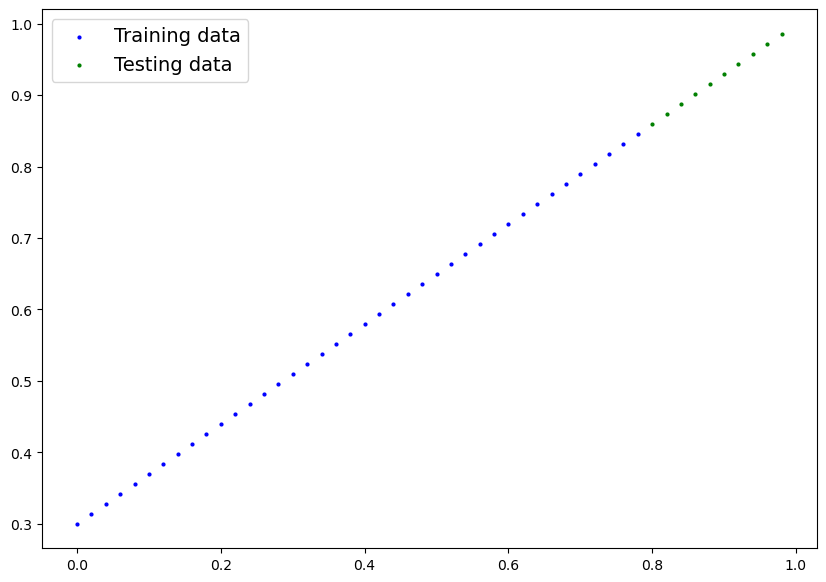

In [7]:
plot_predictions()

## 2. Build Model
Our first PyTorch model!

Because we're goind to build classes throughout the course i'd recommend getting familiar with OOP in Python, todo so you can use the following resourece from Real Python

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [9]:
# Create linear regresssion model class
class LinearRegresssionModel(
    nn.Module
):  # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()  # call the parent class constructor
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )  # create a weight parameter
        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )  # create a bias parameter

        # Forward method to define the computation in the model
        def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input to the model and "y" is the output
            return self.weight * x + self.bias # linear regression equation y = wx + b

### PyTorch's Model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for use 
* torch.nn.module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimize in pytorch live, they will help with gradiant descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

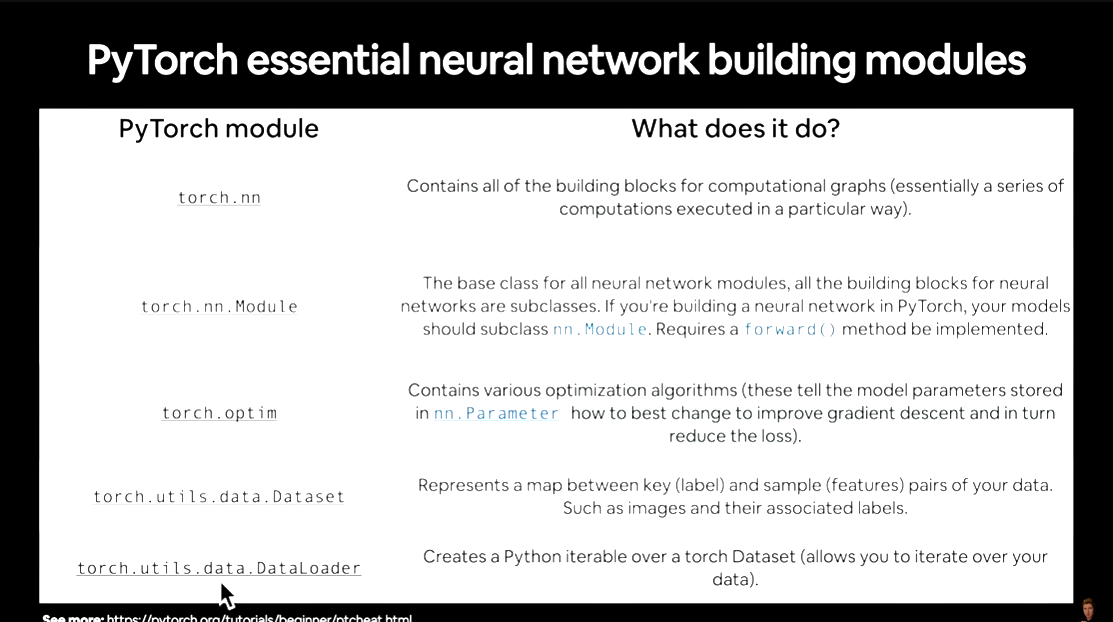

Pytorch CheatSheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the constants of our PyTorch model

Now we've created a model, let's see what's inside...
So we can check our model parameters or what's inside our model using `.parameters().`


In [ ]:
# Create a random seed
torch.manual_seed(42) # set the random seed for reproducibility

# Create a model instance (this is a subclass of nn.Module)
model_0 = LinearRegresssionModel() # create a model instance

# Check out the parameters of the model
list(model_0.parameters()) # list the parameters of the model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
#List name parameters
model_0.state_dict() # print the state dictionary of the model (this contains the parameters of the model)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])